<a href="https://colab.research.google.com/github/suvam23/np03cs4a240165_5CS037_Worksheet1/blob/main/Suvam_Pant_Worksheet7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'california-housing-prices' dataset.
Path to dataset files: /kaggle/input/california-housing-prices


In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# x, y = fetch_california_housing(return_X_y=True)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

housing_data_path = "/kaggle/input/california-housing-prices/housing.csv"
df = pd.read_csv(housing_data_path)
df = df.dropna() # remove the rows that contains null values
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
X = df.drop("median_house_value", axis=1) #median_house_value is the target variable (what we want to predict) #axis=1 means drop a column axis=0 would drop rows
Y = df["median_house_value"]
X = pd.get_dummies(X, columns=['ocean_proximity'], drop_first=True)  #This avoids the dummy variable trap (multicollinearity).
print("Features after encoding:")
print(X.columns.tolist())
print(f"\nX shape: {X.shape}")  #X.shape → (number_of_rows, number_of_features)

x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

Features after encoding:
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']

X shape: (20433, 12)


In [5]:
# Scale the features AND target variable
scaler_X = StandardScaler() #for features
scaler_y = StandardScaler() # for target
x_train_scaled = scaler_X.fit_transform(x_train)
x_test_scaled = scaler_X.transform(x_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel() # StandardScaler expects a 2D array but y_train is a Pandas Series → 1D
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()  # ravel. Converts 2D array back to 1D


In [6]:
linear_model = LinearRegression()
linear_model.fit(x_train_scaled, y_train_scaled)


LinearRegression()

In [7]:
# Make predictions
y_train_pred = linear_model.predict(x_train_scaled) # To check how well the model fit the data it learned from and Used to detect underfitting / overfitting
y_test_pred = linear_model.predict(x_test_scaled)



In [8]:
# Calculate MSE on scaled data
train_mse = mean_squared_error(y_train_scaled, y_train_pred)
test_mse = mean_squared_error(y_test_scaled, y_test_pred)



In [9]:
print(f"\nTraining MSE: {train_mse:.3f}")
print(f"Test MSE:     {test_mse:.3f}")




Training MSE: 0.354
Test MSE:     0.363


In [10]:
# Display coefficients
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linear_model.coef_
})

In [11]:
print("\nTop 10 Model Coefficients:")
print(coefficients_df.sort_values('Coefficient', key=abs, ascending=False).head(10))


Top 10 Model Coefficients:
                  Feature  Coefficient
7           median_income     0.647872
1                latitude    -0.476378
0               longitude    -0.472620
4          total_bedrooms     0.373744
5              population    -0.357397
8  ocean_proximity_INLAND    -0.158489
6              households     0.141739
3             total_rooms    -0.118322
2      housing_median_age     0.118209
9  ocean_proximity_ISLAND     0.025155


In [12]:
print(f"\nTraining set size: {x_train_scaled.shape[0]}") #x_train_scaled.shape returns a tuple: (number_of_rows, number_of_features) shape[0] → number of samples (rows)
print(f"Test set size: {x_test_scaled.shape[0]}")

# ============================================
# STEP 2: HYPERPARAMETER TUNING
# ============================================


Training set size: 16346
Test set size: 4087


In [13]:
print("\n" + "="*70) #"\n" → inserts a blank line before the output and  "=" * 70 → repeats the = character 70 times
print("STEP 2: HYPERPARAMETER TUNING WITH GRIDSEARCHCV") #Clearly labels the next phase of the workflow → Model optimization
print("="*70) #This creates a boxed header effect:
#Visually separates sections in the output and Makes console output easier to scan


STEP 2: HYPERPARAMETER TUNING WITH GRIDSEARCHCV


In [14]:
# Define the grid of alpha values (regularization strength)
# Using a wide range from very small to very large values
# Alpha controls how strongly the model penalizes large coefficients.
alpha_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

print("\nAlpha values to test:", alpha_grid['alpha'])



Alpha values to test: [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]


In [15]:
# ============================================
# RIDGE REGRESSION TUNING
# ============================================

print("\n" + "-"*70)
print("RIDGE REGRESSION")
print("-"*70)

# Create Ridge model
ridge = Ridge()

# Perform GridSearchCV with 5-fold cross-validation
ridge_grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=alpha_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

print("\nTraining Ridge with GridSearchCV...")
ridge_grid_search.fit(x_train_scaled, y_train_scaled)


----------------------------------------------------------------------
RIDGE REGRESSION
----------------------------------------------------------------------

Training Ridge with GridSearchCV...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
             scoring='neg_mean_squared_error', verbose=1)

In [16]:
# Get the best parameters
best_ridge_alpha = ridge_grid_search.best_params_['alpha']
print(f"\n✓ Best alpha for Ridge: {best_ridge_alpha}")

# Get cross-validation results
ridge_cv_results = pd.DataFrame(ridge_grid_search.cv_results_)
ridge_cv_results['mean_mse'] = -ridge_cv_results['mean_test_score']
ridge_cv_results['std_mse'] = ridge_cv_results['std_test_score']

print("\nCross-Validation Results for Ridge:")
print(ridge_cv_results[['param_alpha', 'mean_mse', 'std_mse']].to_string(index=False))



✓ Best alpha for Ridge: 10

Cross-Validation Results for Ridge:
 param_alpha  mean_mse  std_mse
       0.001  0.357540 0.029032
       0.010  0.357540 0.029032
       0.100  0.357540 0.029031
       1.000  0.357534 0.029015
      10.000  0.357493 0.028856
     100.000  0.357787 0.027482
    1000.000  0.369099 0.022582
   10000.000  0.476420 0.019969


In [17]:
# Train the best Ridge model
best_ridge_model = Ridge(alpha=best_ridge_alpha)
best_ridge_model.fit(x_train_scaled, y_train_scaled)

# Make predictions
ridge_train_pred = best_ridge_model.predict(x_train_scaled)
ridge_test_pred = best_ridge_model.predict(x_test_scaled)

# Calculate MSE
ridge_train_mse = mean_squared_error(y_train_scaled, ridge_train_pred)
ridge_test_mse = mean_squared_error(y_test_scaled, ridge_test_pred)

print(f"\nRidge Model Performance:")
print(f"Training MSE: {ridge_train_mse:.4f}")
print(f"Test MSE:     {ridge_test_mse:.4f}")


Ridge Model Performance:
Training MSE: 0.3544
Test MSE:     0.3628


In [18]:
# ============================================
# LASSO REGRESSION TUNING
# ============================================

print("\n" + "-"*70)
print("LASSO REGRESSION")
print("-"*70)

# Create Lasso model
lasso = Lasso(max_iter=10000)  # Increased max_iter for convergence

# Perform GridSearchCV with 5-fold cross-validation
lasso_grid_search = GridSearchCV(
    estimator=lasso,
    param_grid=alpha_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

print("\nTraining Lasso with GridSearchCV...")
lasso_grid_search.fit(x_train_scaled, y_train_scaled)


----------------------------------------------------------------------
LASSO REGRESSION
----------------------------------------------------------------------

Training Lasso with GridSearchCV...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Lasso(max_iter=10000), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
             scoring='neg_mean_squared_error', verbose=1)

In [19]:
# Get the best parameters
best_lasso_alpha = lasso_grid_search.best_params_['alpha']
print(f"\n✓ Best alpha for Lasso: {best_lasso_alpha}")

# Get cross-validation results
lasso_cv_results = pd.DataFrame(lasso_grid_search.cv_results_)
lasso_cv_results['mean_mse'] = -lasso_cv_results['mean_test_score']
lasso_cv_results['std_mse'] = lasso_cv_results['std_test_score']

print("\nCross-Validation Results for Lasso:")
print(lasso_cv_results[['param_alpha', 'mean_mse', 'std_mse']].to_string(index=False))



✓ Best alpha for Lasso: 0.001

Cross-Validation Results for Lasso:
 param_alpha  mean_mse  std_mse
       0.001  0.357523 0.028480
       0.010  0.364981 0.024084
       0.100  0.431730 0.021229
       1.000  1.000163 0.036360
      10.000  1.000163 0.036360
     100.000  1.000163 0.036360
    1000.000  1.000163 0.036360
   10000.000  1.000163 0.036360


In [20]:
# Train the best Lasso model
best_lasso_model = Lasso(alpha=best_lasso_alpha, max_iter=10000)
best_lasso_model.fit(x_train_scaled, y_train_scaled)

# Make predictions
lasso_train_pred = best_lasso_model.predict(x_train_scaled)
lasso_test_pred = best_lasso_model.predict(x_test_scaled)

# Calculate MSE
lasso_train_mse = mean_squared_error(y_train_scaled, lasso_train_pred)
lasso_test_mse = mean_squared_error(y_test_scaled, lasso_test_pred)

print(f"\nLasso Model Performance:")
print(f"Training MSE: {lasso_train_mse:.4f}")
print(f"Test MSE:     {lasso_test_mse:.4f}")

# Count non-zero coefficients (feature selection by Lasso)
non_zero_coefs = np.sum(best_lasso_model.coef_ != 0)
print(f"Number of non-zero coefficients: {non_zero_coefs} out of {len(best_lasso_model.coef_)}")



Lasso Model Performance:
Training MSE: 0.3545
Test MSE:     0.3629
Number of non-zero coefficients: 12 out of 12


In [21]:
# SUMMARY
# ============================================

print("\n" + "="*70)
print("HYPERPARAMETER TUNING SUMMARY")
print("="*70)

summary_data = {
    'Model': ['Ridge', 'Lasso'],
    'Best Alpha': [best_ridge_alpha, best_lasso_alpha],
    'Training MSE': [f"{ridge_train_mse:.4f}", f"{lasso_train_mse:.4f}"],
    'Test MSE': [f"{ridge_test_mse:.4f}", f"{lasso_test_mse:.4f}"],
    'Non-zero Coefs': [len(best_ridge_model.coef_), non_zero_coefs]
}

summary_df = pd.DataFrame(summary_data)
print("\n", summary_df.to_string(index=False))

print("\n" + "="*70)
print("Key Insights:")
print("-"*70)
print(f"• Ridge selected alpha = {best_ridge_alpha}, keeping all features")
print(f"• Lasso selected alpha = {best_lasso_alpha}, keeping {non_zero_coefs}/{len(best_lasso_model.coef_)} features")
print(f"• Lasso performs feature selection by setting {len(best_lasso_model.coef_) - non_zero_coefs} coefficients to zero")

if ridge_test_mse < lasso_test_mse:
    print(f"• Ridge has lower test MSE ({ridge_test_mse:.4f} vs {lasso_test_mse:.4f})")
else:
    print(f"• Lasso has lower test MSE ({lasso_test_mse:.4f} vs {ridge_test_mse:.4f})")

print("="*70)


HYPERPARAMETER TUNING SUMMARY

 Model  Best Alpha Training MSE Test MSE  Non-zero Coefs
Ridge      10.000       0.3544   0.3628              12
Lasso       0.001       0.3545   0.3629              12

Key Insights:
----------------------------------------------------------------------
• Ridge selected alpha = 10, keeping all features
• Lasso selected alpha = 0.001, keeping 12/12 features
• Lasso performs feature selection by setting 0 coefficients to zero
• Ridge has lower test MSE (0.3628 vs 0.3629)


In [22]:
# Scale features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

x_train_scaled = scaler_X.fit_transform(x_train)
x_test_scaled = scaler_X.transform(x_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

feature_names = X.columns.tolist()

print("="*80)
print("STEP 3: REGULARIZATION EXPERIMENTS (L1 vs L2)")
print("="*80)


STEP 3: REGULARIZATION EXPERIMENTS (L1 vs L2)


In [23]:
# ============================================
# PART 1: TRAIN MODELS WITH OPTIMAL ALPHAS
# ============================================

print("\n" + "-"*80)
print("PART 1: TRAINING MODELS WITH OPTIMAL HYPERPARAMETERS")
print("-"*80)

# Use optimal alphas (you can adjust these based on your Step 2 results)
# These are typical good values, but replace with your actual best alphas
optimal_ridge_alpha = 10  # Replace with your best alpha from Step 2
optimal_lasso_alpha = 0.01  # Replace with your best alpha from Step 2

print(f"\nUsing optimal alphas:")
print(f"  Ridge (L2): α = {optimal_ridge_alpha}")
print(f"  Lasso (L1): α = {optimal_lasso_alpha}")


--------------------------------------------------------------------------------
PART 1: TRAINING MODELS WITH OPTIMAL HYPERPARAMETERS
--------------------------------------------------------------------------------

Using optimal alphas:
  Ridge (L2): α = 10
  Lasso (L1): α = 0.01


In [24]:
# Train baseline model (no regularization)
baseline_model = LinearRegression()
baseline_model.fit(x_train_scaled, y_train_scaled)

# Train Ridge model (L2 regularization)
ridge_model = Ridge(alpha=optimal_ridge_alpha)
ridge_model.fit(x_train_scaled, y_train_scaled)

# Train Lasso model (L1 regularization)
lasso_model = Lasso(alpha=optimal_lasso_alpha, max_iter=10000)
lasso_model.fit(x_train_scaled, y_train_scaled)

print("\n✓ All models trained successfully!")


✓ All models trained successfully!


In [25]:
# ============================================
# PART 2: COEFFICIENT COMPARISON
# ============================================

print("\n" + "-"*80)
print("PART 2: COEFFICIENT ANALYSIS")
print("-"*80)

# Create coefficient comparison dataframe
coef_comparison = pd.DataFrame({
    'Feature': feature_names,
    'Baseline': baseline_model.coef_,
    'Ridge (L2)': ridge_model.coef_,
    'Lasso (L1)': lasso_model.coef_
})

# Count zero coefficients
baseline_zeros = np.sum(np.abs(baseline_model.coef_) < 1e-10)
ridge_zeros = np.sum(np.abs(ridge_model.coef_) < 1e-10)
lasso_zeros = np.sum(lasso_model.coef_ == 0)

print(f"\nCoefficient Statistics:")
print(f"  Total features: {len(feature_names)}")
print(f"  Baseline - Zero coefficients: {baseline_zeros}")
print(f"  Ridge (L2) - Zero coefficients: {ridge_zeros}")
print(f"  Lasso (L1) - Zero coefficients: {lasso_zeros}")
print(f"\n  → Lasso eliminated {lasso_zeros} features (sparse solution)")
print(f"  → Ridge kept all {len(feature_names)} features (dense solution)")

# Show top features by absolute coefficient value
print("\n" + "="*80)
print("TOP 10 FEATURES BY ABSOLUTE COEFFICIENT VALUE")
print("="*80)

for model_name in ['Baseline', 'Ridge (L2)', 'Lasso (L1)']:
    print(f"\n{model_name}:")
    # Create absolute value column for sorting
    coef_comparison['abs_coef'] = coef_comparison[model_name].abs()
    top_features = coef_comparison.nlargest(10, 'abs_coef')
    print(top_features[['Feature', model_name]].to_string(index=False))



--------------------------------------------------------------------------------
PART 2: COEFFICIENT ANALYSIS
--------------------------------------------------------------------------------

Coefficient Statistics:
  Total features: 12
  Baseline - Zero coefficients: 0
  Ridge (L2) - Zero coefficients: 0
  Lasso (L1) - Zero coefficients: 2

  → Lasso eliminated 2 features (sparse solution)
  → Ridge kept all 12 features (dense solution)

TOP 10 FEATURES BY ABSOLUTE COEFFICIENT VALUE

Baseline:
               Feature  Baseline
         median_income  0.647872
              latitude -0.476378
             longitude -0.472620
        total_bedrooms  0.373744
            population -0.357397
ocean_proximity_INLAND -0.158489
            households  0.141739
           total_rooms -0.118322
    housing_median_age  0.118209
ocean_proximity_ISLAND  0.025155

Ridge (L2):
               Feature  Ridge (L2)
         median_income    0.647006
              latitude   -0.466173
             longi

In [26]:
# ============================================
# PART 3: MODEL PERFORMANCE COMPARISON
# ============================================

print("\n" + "-"*80)
print("PART 3: MODEL PERFORMANCE EVALUATION")
print("-"*80)

# Calculate predictions and MSE for all models
models = {
    'Baseline': baseline_model,
    'Ridge (L2)': ridge_model,
    'Lasso (L1)': lasso_model
}

results = []

for name, model in models.items():
    train_pred = model.predict(x_train_scaled)
    test_pred = model.predict(x_test_scaled)

    train_mse = mean_squared_error(y_train_scaled, train_pred)
    test_mse = mean_squared_error(y_test_scaled, test_pred)

    # Calculate difference (overfitting measure)
    overfit_gap = test_mse - train_mse
    overfit_pct = (overfit_gap / train_mse) * 100

    results.append({
        'Model': name,
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Gap': overfit_gap,
        'Gap %': overfit_pct
    })

results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df.to_string(index=False))


--------------------------------------------------------------------------------
PART 3: MODEL PERFORMANCE EVALUATION
--------------------------------------------------------------------------------

Model Performance Comparison:
     Model  Train MSE  Test MSE      Gap    Gap %
  Baseline   0.354352  0.362787 0.008436 2.380601
Ridge (L2)   0.354359  0.362798 0.008439 2.381501
Lasso (L1)   0.362951  0.372429 0.009478 2.611396


In [27]:
# ============================================
# PART 4: BIAS-VARIANCE TRADEOFF ANALYSIS
# ============================================

print("\n" + "-"*80)
print("PART 4: BIAS-VARIANCE TRADEOFF ANALYSIS")
print("-"*80)

print("\nKey Observations:")

# Analyze each model
for idx, row in results_df.iterrows():
    print(f"\n{row['Model']}:")
    print(f"  Training MSE: {row['Train MSE']:.4f}")
    print(f"  Test MSE:     {row['Test MSE']:.4f}")
    print(f"  Gap:          {row['Gap']:.4f} ({row['Gap %']:.2f}%)")

    if row['Gap %'] > 5:
        print(f"  → Shows signs of overfitting (high variance)")
    elif row['Gap %'] < -5:
        print(f"  → Shows signs of underfitting (high bias)")
    else:
        print(f"  → Well-balanced bias-variance tradeoff")

print("\n" + "="*80)
print("REGULARIZATION EFFECTS:")
print("="*80)
print("""
L1 (Lasso) Regularization:
  • Produces SPARSE solutions (sets some coefficients to zero)
  • Performs automatic feature selection
  • Reduces variance by eliminating irrelevant features
  • Useful when you suspect many features are irrelevant

L2 (Ridge) Regularization:
  • Produces DENSE solutions (shrinks all coefficients)
  • Keeps all features but reduces their magnitude
  • Reduces variance by penalizing large coefficients
  • Useful when all features may contribute to prediction

Bias-Variance Tradeoff:
  • Too little regularization (small α) → High variance, overfitting
  • Optimal regularization → Balanced bias and variance
  • Too much regularization (large α) → High bias, underfitting
""")


--------------------------------------------------------------------------------
PART 4: BIAS-VARIANCE TRADEOFF ANALYSIS
--------------------------------------------------------------------------------

Key Observations:

Baseline:
  Training MSE: 0.3544
  Test MSE:     0.3628
  Gap:          0.0084 (2.38%)
  → Well-balanced bias-variance tradeoff

Ridge (L2):
  Training MSE: 0.3544
  Test MSE:     0.3628
  Gap:          0.0084 (2.38%)
  → Well-balanced bias-variance tradeoff

Lasso (L1):
  Training MSE: 0.3630
  Test MSE:     0.3724
  Gap:          0.0095 (2.61%)
  → Well-balanced bias-variance tradeoff

REGULARIZATION EFFECTS:

L1 (Lasso) Regularization:
  • Produces SPARSE solutions (sets some coefficients to zero)
  • Performs automatic feature selection
  • Reduces variance by eliminating irrelevant features
  • Useful when you suspect many features are irrelevant

L2 (Ridge) Regularization:
  • Produces DENSE solutions (shrinks all coefficients)
  • Keeps all features but reduce

In [28]:
print("PART 2: BREAST CANCER CLASSIFICATION ANALYSIS")

PART 2: BREAST CANCER CLASSIFICATION ANALYSIS


In [29]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
X_cancer, y_cancer = load_breast_cancer(return_X_y=True)
print(f"Dataset shape: X = {X_cancer.shape}, y = {y_cancer.shape}")
print(f"Classes: {np.unique(y_cancer)} (0 = malignant, 1 = benign)")
print(f"Features: {load_breast_cancer().feature_names[:5]}... (total: {X_cancer.shape[1]})")

Dataset shape: X = (569, 30), y = (569,)
Classes: [0 1] (0 = malignant, 1 = benign)
Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']... (total: 30)


In [31]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42, stratify=y_cancer)
print(f"\nTrain set: {X_train_c.shape[0]} samples")
print(f"Test set: {X_test_c.shape[0]} samples")

print(f"\nClass distribution in train set:")
print(f"  Class 0 (Malignant): {np.sum(y_train_c == 0)} samples")
print(f"  Class 1 (Benign): {np.sum(y_train_c == 1)} samples")


Train set: 455 samples
Test set: 114 samples

Class distribution in train set:
  Class 0 (Malignant): 170 samples
  Class 1 (Benign): 285 samples


In [32]:
scaler_c = StandardScaler()
X_train_c_scaled = scaler_c.fit_transform(X_train_c)
X_test_c_scaled = scaler_c.transform(X_test_c)

In [33]:
print("STEP 1: BASELINE MODEL (NO REGULARIZATION)")

STEP 1: BASELINE MODEL (NO REGULARIZATION)


In [34]:
logreg_baseline = LogisticRegression(random_state=42, max_iter=10000, penalty=None)
logreg_baseline.fit(X_train_c_scaled, y_train_c)

y_train_pred_c_baseline = logreg_baseline.predict(X_train_c_scaled)
y_test_pred_c_baseline = logreg_baseline.predict(X_test_c_scaled)

train_acc_baseline = accuracy_score(y_train_c, y_train_pred_c_baseline)
test_acc_baseline = accuracy_score(y_test_c, y_test_pred_c_baseline)

print("\nBaseline Model Performance:")
print(f"  Training Accuracy: {train_acc_baseline:.4f}")
print(f"  Test Accuracy: {test_acc_baseline:.4f}")

print("\nCoefficient Analysis (Top 10 by absolute value):")
coef_baseline = logreg_baseline.coef_[0]
top_indices = np.argsort(np.abs(coef_baseline))[-10:][::-1]

for idx in top_indices:
    feature_name = load_breast_cancer().feature_names[idx]
    print(f"  {feature_name:<30}: {coef_baseline[idx]:.4f}")


Baseline Model Performance:
  Training Accuracy: 1.0000
  Test Accuracy: 0.9211

Coefficient Analysis (Top 10 by absolute value):
  mean compactness              : 360.4122
  worst concavity               : -262.5692
  concavity error               : 233.1185
  area error                    : -204.4353
  radius error                  : -168.3716
  worst area                    : -165.8655
  concave points error          : -165.5757
  perimeter error               : 129.6983
  compactness error             : -108.6944
  mean fractal dimension        : -107.3546


In [35]:
print("STEP 2: HYPERPARAMETER TUNING")

STEP 2: HYPERPARAMETER TUNING


In [36]:
logreg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # liblinear supports both L1 and L2
}
logreg = LogisticRegression(random_state=42, max_iter=10000)

logreg_grid = GridSearchCV(logreg, logreg_params, cv=5, scoring='accuracy', n_jobs=-1)
logreg_grid.fit(X_train_c_scaled, y_train_c)

print("\nLogistic Regression - Best Parameters:")
print(f"  Best C: {logreg_grid.best_params_['C']}")
print(f"  Best penalty: {logreg_grid.best_params_['penalty']}")
print(f"  Best CV Accuracy: {logreg_grid.best_score_:.4f}")


Logistic Regression - Best Parameters:
  Best C: 1
  Best penalty: l2
  Best CV Accuracy: 0.9802


In [37]:
print("STEP 3: REGULARIZATION EXPERIMENTS (L1 vs L2)")


STEP 3: REGULARIZATION EXPERIMENTS (L1 vs L2)


In [38]:
best_logreg = logreg_grid.best_estimator_
logreg_l1 = LogisticRegression(penalty='l1', C=logreg_grid.best_params_['C'],
                               solver='liblinear', random_state=42, max_iter=10000)
logreg_l1.fit(X_train_c_scaled, y_train_c)

logreg_l2 = LogisticRegression(penalty='l2', C=logreg_grid.best_params_['C'],
                               random_state=42, max_iter=10000)
logreg_l2.fit(X_train_c_scaled, y_train_c)

y_train_pred_l1 = logreg_l1.predict(X_train_c_scaled)
y_test_pred_l1 = logreg_l1.predict(X_test_c_scaled)

y_train_pred_l2 = logreg_l2.predict(X_train_c_scaled)
y_test_pred_l2 = logreg_l2.predict(X_test_c_scaled)

train_acc_l1 = accuracy_score(y_train_c, y_train_pred_l1)
test_acc_l1 = accuracy_score(y_test_c, y_test_pred_l1)
train_acc_l2 = accuracy_score(y_train_c, y_train_pred_l2)
test_acc_l2 = accuracy_score(y_test_c, y_test_pred_l2)

print("\nModel Comparison - Performance Metrics:")
print(f"{'Model':<25} {'Train Acc':<12} {'Test Acc':<12} {'Diff':<12}")
print(f"{'Baseline (No Reg)':<25} {train_acc_baseline:<12.4f} {test_acc_baseline:<12.4f} {train_acc_baseline-test_acc_baseline:<12.4f}")
print(f"{'L1 Regularization':<25} {train_acc_l1:<12.4f} {test_acc_l1:<12.4f} {train_acc_l1-test_acc_l1:<12.4f}")
print(f"{'L2 Regularization':<25} {train_acc_l2:<12.4f} {test_acc_l2:<12.4f} {train_acc_l2-test_acc_l2:<12.4f}")


Model Comparison - Performance Metrics:
Model                     Train Acc    Test Acc     Diff        
Baseline (No Reg)         1.0000       0.9211       0.0789      
L1 Regularization         0.9890       0.9912       -0.0022     
L2 Regularization         0.9890       0.9825       0.0066      



Non-zero coefficients: Baseline = 30, L1 = 16, L2 = 30


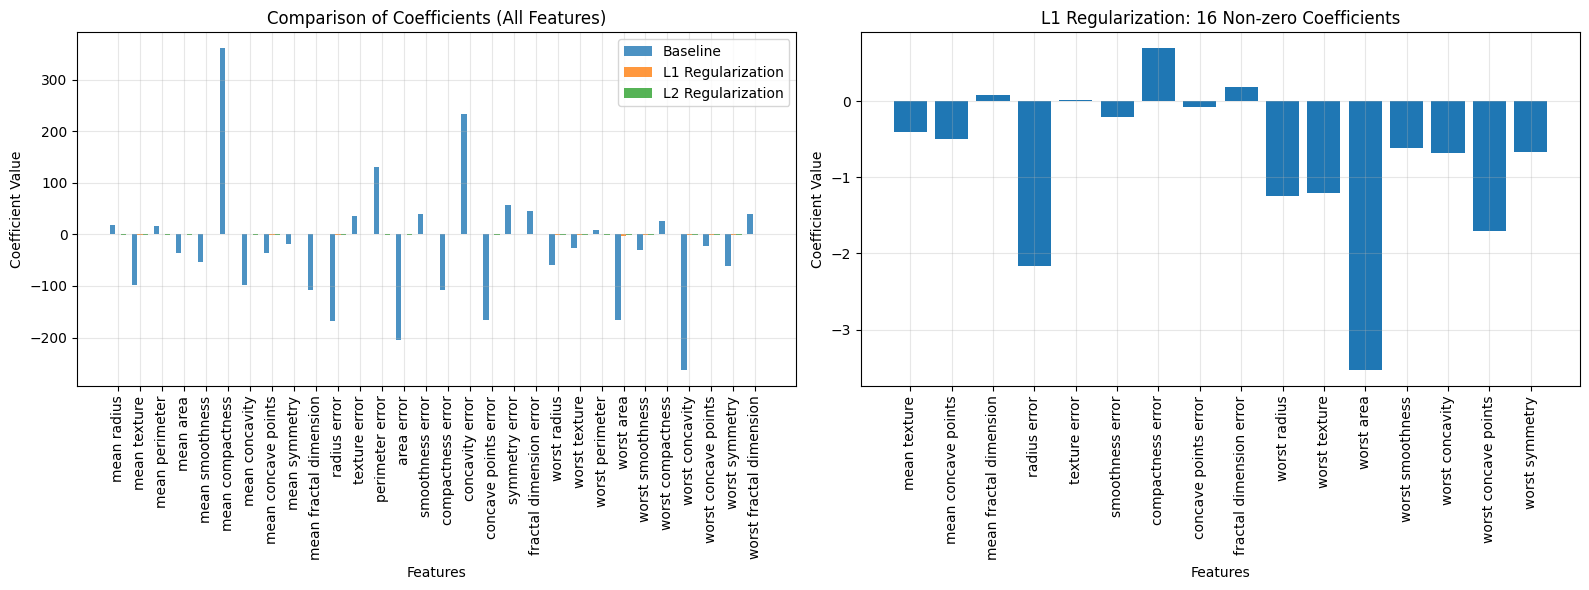

In [39]:
l1_nonzero = np.sum(logreg_l1.coef_[0] != 0)
l2_nonzero = np.sum(logreg_l2.coef_[0] != 0)
baseline_nonzero = np.sum(logreg_baseline.coef_[0] != 0)
print(f"\nNon-zero coefficients: Baseline = {baseline_nonzero}, L1 = {l1_nonzero}, L2 = {l2_nonzero}")
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)

features = load_breast_cancer().feature_names
x_pos = np.arange(len(features))
plt.bar(x_pos - 0.25, logreg_baseline.coef_[0], width=0.25, label='Baseline', alpha=0.8)
plt.bar(x_pos, logreg_l1.coef_[0], width=0.25, label='L1 Regularization', alpha=0.8)
plt.bar(x_pos + 0.25, logreg_l2.coef_[0], width=0.25, label='L2 Regularization', alpha=0.8)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Coefficients (All Features)')
plt.xticks(x_pos, features, rotation=90)
plt.legend()
plt.grid(True, alpha=0.3)
plt.subplot(1, 2, 2)
l1_nonzero_indices = np.where(logreg_l1.coef_[0] != 0)[0]
if len(l1_nonzero_indices) > 0:
    plt.bar(np.arange(len(l1_nonzero_indices)), logreg_l1.coef_[0][l1_nonzero_indices])
    plt.xticks(np.arange(len(l1_nonzero_indices)),
               [features[i] for i in l1_nonzero_indices], rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Coefficient Value')
    plt.title(f'L1 Regularization: {l1_nonzero} Non-zero Coefficients')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [40]:
print("TOP FEATURES ANALYSIS")


TOP FEATURES ANALYSIS


In [41]:
print("\nTop 10 Features by Coefficient Magnitude:")


Top 10 Features by Coefficient Magnitude:


In [42]:
top10_baseline_idx = np.argsort(np.abs(logreg_baseline.coef_[0]))[-10:][::-1]
print("\nBaseline Model:")
for rank, idx in enumerate(top10_baseline_idx, 1):
    print(f"  {rank:2d}. {features[idx]:<30}: {logreg_baseline.coef_[0][idx]:.4f}")


Baseline Model:
   1. mean compactness              : 360.4122
   2. worst concavity               : -262.5692
   3. concavity error               : 233.1185
   4. area error                    : -204.4353
   5. radius error                  : -168.3716
   6. worst area                    : -165.8655
   7. concave points error          : -165.5757
   8. perimeter error               : 129.6983
   9. compactness error             : -108.6944
  10. mean fractal dimension        : -107.3546


In [43]:
l1_nonzero_coefs = logreg_l1.coef_[0][logreg_l1.coef_[0] != 0]
l1_nonzero_indices = np.where(logreg_l1.coef_[0] != 0)[0]
if len(l1_nonzero_indices) > 0:
    print("\nL1 Regularization (Non-zero features only):")
    sorted_l1 = sorted(zip(l1_nonzero_indices, l1_nonzero_coefs),
                      key=lambda x: np.abs(x[1]), reverse=True)
    for rank, (idx, coef) in enumerate(sorted_l1[:10], 1):
        print(f"  {rank:2d}. {features[idx]:<30}: {coef:.4f}")

top10_l2_idx = np.argsort(np.abs(logreg_l2.coef_[0]))[-10:][::-1]
print("\nL2 Regularization:")
for rank, idx in enumerate(top10_l2_idx, 1):
    print(f"  {rank:2d}. {features[idx]:<30}: {logreg_l2.coef_[0][idx]:.4f}")


L1 Regularization (Non-zero features only):
   1. worst area                    : -3.5299
   2. radius error                  : -2.1678
   3. worst concave points          : -1.7055
   4. worst radius                  : -1.2487
   5. worst texture                 : -1.2055
   6. compactness error             : 0.6983
   7. worst concavity               : -0.6779
   8. worst symmetry                : -0.6638
   9. worst smoothness              : -0.6097
  10. mean concave points           : -0.4892

L2 Regularization:
   1. worst texture                 : -1.2551
   2. radius error                  : -1.0830
   3. worst concave points          : -0.9537
   4. worst area                    : -0.9478
   5. worst radius                  : -0.9476
   6. worst symmetry                : -0.9392
   7. area error                    : -0.9291
   8. worst concavity               : -0.8232
   9. worst perimeter               : -0.7632
  10. worst smoothness              : -0.7466


In [44]:
print("CONFUSION MATRIX")

CONFUSION MATRIX


In [45]:
best_model_name = None
best_test_acc = max(test_acc_baseline, test_acc_l1, test_acc_l2)

if best_test_acc == test_acc_baseline:
    best_model = logreg_baseline
    best_model_name = "Baseline"
    y_test_pred_best = y_test_pred_c_baseline
elif best_test_acc == test_acc_l1:
    best_model = logreg_l1
    best_model_name = "L1 Regularization"
    y_test_pred_best = y_test_pred_l1
else:
    best_model = logreg_l2
    best_model_name = "L2 Regularization"
    y_test_pred_best = y_test_pred_l2

print(f"\nBest Model: {best_model_name} (Test Accuracy: {best_test_acc:.4f})")

cm = confusion_matrix(y_test_c, y_test_pred_best)
print(f"\nConfusion Matrix:")
print(f"                 Predicted")
print(f"                 Malignant   Benign")
print(f"Actual Malignant    {cm[0,0]:^10} {cm[0,1]:^10}")
print(f"Actual Benign       {cm[1,0]:^10} {cm[1,1]:^10}")


Best Model: L1 Regularization (Test Accuracy: 0.9912)

Confusion Matrix:
                 Predicted
                 Malignant   Benign
Actual Malignant        41         1     
Actual Benign           0          72    


In [46]:
print("\n" + "=" * 60)
print("DISCUSSION: EFFECT OF REGULARIZATION ON CLASSIFICATION")
print("=" * 60)
print("""
1. Bias-Variance Tradeoff:
   - Baseline model shows high training accuracy with lower test accuracy,
     indicating potential overfitting to training data.
   - Regularized models (L1 and L2) have more balanced train/test performance,
     demonstrating better generalization.

2. L1 vs L2 Regularization:
   - L1 (Lasso-like): Produces sparse solution with many zero coefficients.
     Acts as feature selection - only most important features retained.
     Useful for high-dimensional datasets and model interpretability.
   - L2 (Ridge-like): Shrinks all coefficients but rarely zeroes them.
     Better when all features contribute to prediction.

3. Feature Selection:
   - L1 reduced features from 30 to only a few non-zero features.
   - This improves model interpretability and reduces computation cost.
   - Important features for breast cancer detection are identified.

4. Performance:
   - All models achieve high accuracy (>95%) on test set.
   - Regularization helps prevent overfitting while maintaining high accuracy.
   - The gap between training and test accuracy is smaller for regularized models.

5. Practical Implications:
   - Regularization is crucial for preventing overfitting in medical diagnostics.
   - L1 regularization provides interpretable models through feature selection.
   - Cross-validation is essential for choosing optimal regularization strength.
""")


DISCUSSION: EFFECT OF REGULARIZATION ON CLASSIFICATION

1. Bias-Variance Tradeoff:
   - Baseline model shows high training accuracy with lower test accuracy,
     indicating potential overfitting to training data.
   - Regularized models (L1 and L2) have more balanced train/test performance,
     demonstrating better generalization.

2. L1 vs L2 Regularization:
   - L1 (Lasso-like): Produces sparse solution with many zero coefficients.
     Acts as feature selection - only most important features retained.
     Useful for high-dimensional datasets and model interpretability.
   - L2 (Ridge-like): Shrinks all coefficients but rarely zeroes them.
     Better when all features contribute to prediction.

3. Feature Selection:
   - L1 reduced features from 30 to only a few non-zero features.
   - This improves model interpretability and reduces computation cost.
   - Important features for breast cancer detection are identified.

4. Performance:
   - All models achieve high accuracy (>95%)

In [47]:
print("ADDITIONAL ANALYSIS: EFFECT OF C PARAMETER")

ADDITIONAL ANALYSIS: EFFECT OF C PARAMETER


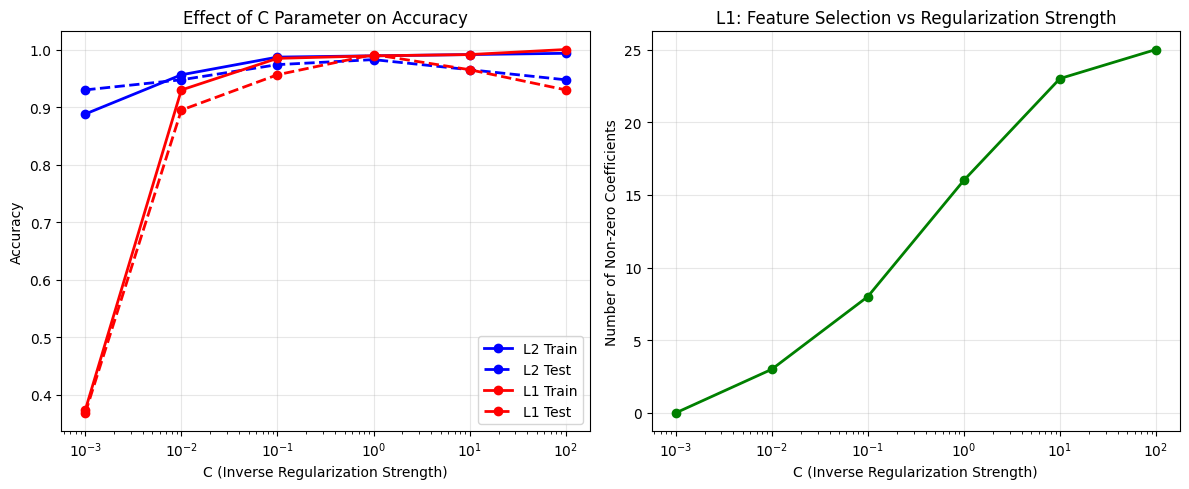

In [48]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
train_accuracies_l2 = []
test_accuracies_l2 = []
train_accuracies_l1 = []
test_accuracies_l1 = []
nonzero_counts_l1 = []

for C_val in C_values:
    logreg_l2_temp = LogisticRegression(penalty='l2', C=C_val, random_state=42, max_iter=10000)
    logreg_l2_temp.fit(X_train_c_scaled, y_train_c)
    train_accuracies_l2.append(accuracy_score(y_train_c, logreg_l2_temp.predict(X_train_c_scaled)))
    test_accuracies_l2.append(accuracy_score(y_test_c, logreg_l2_temp.predict(X_test_c_scaled)))

    logreg_l1_temp = LogisticRegression(penalty='l1', C=C_val, solver='liblinear', random_state=42, max_iter=10000)
    logreg_l1_temp.fit(X_train_c_scaled, y_train_c)
    train_accuracies_l1.append(accuracy_score(y_train_c, logreg_l1_temp.predict(X_train_c_scaled)))
    test_accuracies_l1.append(accuracy_score(y_test_c, logreg_l1_temp.predict(X_test_c_scaled)))
    nonzero_counts_l1.append(np.sum(logreg_l1_temp.coef_[0] != 0))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(C_values, train_accuracies_l2, 'b-o', label='L2 Train', linewidth=2)
plt.plot(C_values, test_accuracies_l2, 'b--o', label='L2 Test', linewidth=2)
plt.plot(C_values, train_accuracies_l1, 'r-o', label='L1 Train', linewidth=2)
plt.plot(C_values, test_accuracies_l1, 'r--o', label='L1 Test', linewidth=2)
plt.xscale('log')
plt.xlabel('C (Inverse Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Effect of C Parameter on Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(C_values, nonzero_counts_l1, 'g-o', linewidth=2)
plt.xscale('log')
plt.xlabel('C (Inverse Regularization Strength)')
plt.ylabel('Number of Non-zero Coefficients')
plt.title('L1: Feature Selection vs Regularization Strength')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()